In [84]:
"""the "broad tags" is simply a way to treat the data in a very easy manner - in the sense 
that a data value can only have one label
for the purposes of learning about simple models using data I collect from the Internet"""

"""data collected using search.py script which writes to the DataFrame object"""

import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [56]:
if os.path.isfile("vids.pkl"):
    vids = pd.read_pickle("vids.pkl")
    
#randomise rows
vids = vids.sample(frac=1).reset_index(drop=True)

#we will use title and broad tag first

training, test = train_test_split(vids, test_size=0.33, random_state=42)
train_x = training["title"]
train_y = training["Broad Tag"]

test_x = test["title"]
test_y = test["Broad Tag"]

In [57]:
#input is text, so we need to make them into arrays of numbers
vect = CountVectorizer()
tr_x = vect.fit_transform(train_x)
tes_x = vect.transform(test_x)

#print(tr_x[0].toarray())

In [58]:
#Classification

SVM = svm.SVC(kernel='linear')

SVM.fit(tr_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
pred_y = SVM.predict(tes_x)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

              precision    recall  f1-score   support

      Comedy       1.00      1.00      1.00         8
      Gaming       1.00      1.00      1.00        12
       Music       1.00      1.00      1.00        26
        News       1.00      1.00      1.00        12
      Sports       1.00      1.00      1.00        10
    Tutorial       1.00      1.00      1.00        14

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

[[ 8  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 14]]


In [67]:
#test vector
SVM.predict(vect.transform(['sample text']))

array(['Music'], dtype=object)

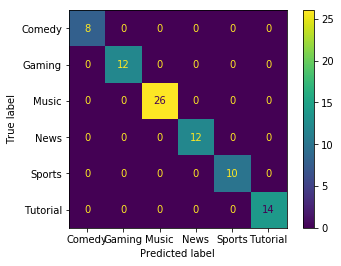

In [75]:
#import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y, pred_y)

plot_confusion_matrix(SVM, tes_x, test_y)

accuracy = 0.9634146341463414
              precision    recall  f1-score   support

      Comedy       0.89      1.00      0.94         8
      Gaming       1.00      1.00      1.00        12
       Music       0.93      0.96      0.94        26
        News       1.00      1.00      1.00        12
      Sports       1.00      0.90      0.95        10
    Tutorial       1.00      0.93      0.96        14

    accuracy                           0.96        82
   macro avg       0.97      0.97      0.97        82
weighted avg       0.97      0.96      0.96        82



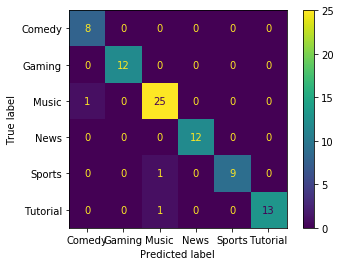

In [116]:
#decision tree classifier

DT = DecisionTreeClassifier(random_state=0)
DT.fit(tr_x, train_y)

predDT = DT.predict(tes_x)

####
acc = np.array(predDT == test_y, dtype=bool)
u, cts = np.unique(acc, return_counts="True")
accuracy = cts[1]/np.sum(cts)
####

print("accuracy =", accuracy)
print(classification_report(test_y, predDT))
plot_confusion_matrix(DT, tes_x, test_y)

In [115]:
DT.predict(vect.transform(['sample text']))

array(['Music'], dtype=object)